In [23]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import json
from analyse_helper import load_ocelot_data

BASE_DIR = "../2022-11-24-data/"

In [150]:
 # IPAC PLOT SIZES
TEXTWIDTH = 483.69684
LINEWIDTH = 214.7352
#pt_to_inches = 1/72.27
fig_width_pt = TEXTWIDTH
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

 
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=8)
#plt.rc('ytick', labelsize=8)
#plt.rc('axes', labelsize=8)

params = {'axes.titlesize': 8,
          'axes.labelsize': 8,
          'legend.fontsize': 8,
          'xtick.labelsize': 6,
          'ytick.labelsize': 6,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

8.0

In [24]:
simplexdata = load_ocelot_data(BASE_DIR+"simplex/2022-11-24 09-04-27.json")
with open(BASE_DIR+"bo/benchmark_ucb_2022_11_24-08_56_30.json", "r") as f:
    bodata = json.load(f)

In [113]:
bodata["metadata"]

{'input': ['XFEL.FEL/UNDULATOR.SASE1/CAX.CELL3.SA1/FIELD.OFFSET',
  'XFEL.FEL/UNDULATOR.SASE1/CAY.CELL3.SA1/FIELD.OFFSET'],
 'objective': 'XFEL.FEL/XGM/XGM.2643.T9/INTENSITY.SA1.RAW.TRAIN',
 'nreadings': 30,
 'interval': 0.1,
 'max_iter': 50,
 'bounds': [[-0.5, -0.5], [0.5, 0.5]],
 'acquisition': 'UCB',
 'step_limit_type': 'proximal',
 'proximal_len': [0.5, 0.5],
 'step_size': 0.10000000149011612,
 'fixed_noise': False}

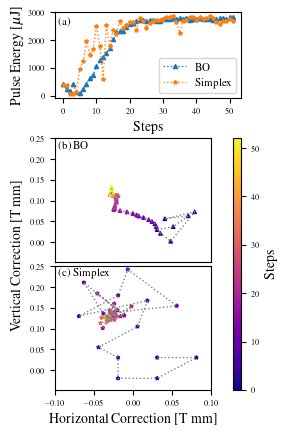

In [152]:
fig = plt.figure(figsize=(LINEWIDTH*inches_per_pt, LINEWIDTH*inches_per_pt*1.5))
gs = fig.add_gridspec(4,2, width_ratios =(1,0.05), height_ratios = (0.7,0.25,1,1))
ax_progress = fig.add_subplot(gs[0,:])
ax_bo = fig.add_subplot(gs[2,0])
ax_simplex = fig.add_subplot(gs[3,0])
ax_cbar = fig.add_subplot(gs[2:,1])
ax_space = fig.add_subplot(gs[1,:])
ax_space.set_visible(False)

y_len = len(simplexdata["Y"])
ax_progress.plot(bodata["Y"][:y_len], ls=":", lw=1, marker="^", markersize=3, label="BO")
ax_progress.plot(simplexdata["Y"],ls=":", lw=1, marker="*", markersize=3, label="Simplex")
ax_progress.set_xlabel("Steps")
ax_progress.set_ylabel(r"Pulse Energy [$\mu$J]")
ax_progress.legend()
ax_progress.text(x=0.02,y=0.85,s="(a)",transform=ax_progress.transAxes, fontsize=8)

im = ax_bo.scatter(np.array(bodata["X"])[:,0], np.array(bodata["X"])[:,1],c=np.arange(np.array(bodata["X"]).shape[0]), marker="^", 
                   cmap="plasma", s=6, vmin=0, vmax=y_len)
ax_bo.plot(np.array(bodata["X"])[:,0], np.array(bodata["X"])[:,1],ls=':',lw=1,c="grey")
ax_simplex.scatter(np.array(simplexdata["X"])[:,0], np.array(simplexdata["X"])[:,1],c=np.arange(np.array(simplexdata["X"]).shape[0]), marker="*",
                    cmap="plasma",s=6, vmin=0, vmax=y_len)
ax_simplex.plot(np.array(simplexdata["X"])[:,0], np.array(simplexdata["X"])[:,1], ls=":",lw=1,c="grey")
for ax in [ax_bo, ax_simplex]:
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.048,0.25)
ax_bo.set_xticks([])
ax_simplex.sharey(ax_bo)
fig.text(0.05,0.25,r"Vertical Correction [T mm]",rotation=90) # y label
ax_simplex.set_xlabel(r"Horizontal Correction [T mm]")
fig.colorbar(im, cax=ax_cbar)
ax_cbar.set_ylabel("Steps")
ax_bo.text(x=0.02,y=0.92,s="(b) BO",transform=ax_bo.transAxes, fontsize=8)
ax_simplex.text(x=0.02,y=0.92,s="(c) Simplex",transform=ax_simplex.transAxes, fontsize=8)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

fig.savefig("../plots/2d_progress.pdf", bbox_inches="tight")